Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026

Branch: AI-ML A1

##**Experiment 6**

###**1. Title:**
Pneumonia Classification using Chest X-rays based on Convolutional Neural Networks (CNN)

###**2. Objectives:**

1. Study the Pneumonia dataset and the characteristics of chest X-ray images.

2. Understand the architecture and functionality of Convolutional Neural Networks (CNN).

3. Implement pneumonia detection using CNN.

###**3. Theory:**

Pneumonia is a severe respiratory infection that can be identified through chest X-rays. With advancements in deep learning, Convolutional Neural Networks (CNNs) have proven highly effective in medical image classification tasks. CNNs automatically extract spatial features from images, making them suitable for detecting patterns such as lung abnormalities indicative of pneumonia.

In this experiment, we use a CNN to classify chest X-rays as either normal or pneumonia. The convolutional layers capture features such as edges and textures, while max-pooling reduces dimensionality, and fully connected layers help make predictions based on these extracted features.

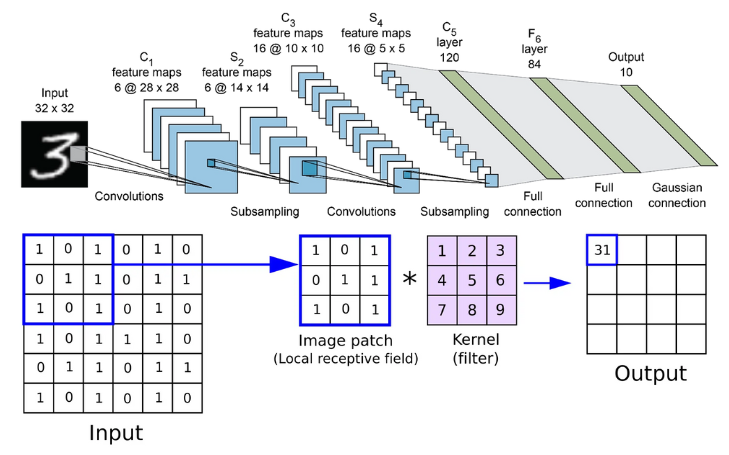

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aparnaiyerbtech2022","key":"bdd20396e5ff54a45a07f0762a2a8def"}'}

In [ ]:
# Make a .kaggle directory in the home directory
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json to the .kaggle directory
!mv kaggle (1).json ~/.kaggle/

# Change the permissions of the file to ensure it's secure
!chmod 600 ~/.kaggle/kaggle (1).json


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `mv kaggle (1).json ~/.kaggle/'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 ~/.kaggle/kaggle (1).json'


In [ ]:
!kaggle datasets download -d jtiptj/chest-xray-pneumoniacovid19tuberculosis

Dataset URL: https://www.kaggle.com/datasets/jtiptj/chest-xray-pneumoniacovid19tuberculosis
License(s): other
100% 1.74G/1.74G [00:26<00:00, 115MB/s] 
100% 1.74G/1.74G [00:26<00:00, 69.9MB/s]


In [ ]:
!unzip -q chest-xray-pneumoniacovid19tuberculosis.zip -d chest_xray_dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

**A. CNN from Scratch**

In [ ]:
# Define paths
train_dir = '/content/chest_xray_dataset/train'
validation_dir = '/content/chest_xray_dataset/val'
test_dir = '/content/chest_xray_dataset/test'

# Image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [ ]:
def build_cnn_model(input_shape=(224, 224, 3)):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())

    # Convolutional Block 2
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())

    # Convolutional Block 3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    return model

model = build_cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 111, 111, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 54, 54, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCHS = 5


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 875s 4s/step - accuracy: 0.2103 - loss: -29524.4922 - val_accuracy: 0.2188 - val_loss: -79243.8672
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 885us/step - accuracy: 0.1562 - loss: -309594.8125 - val_accuracy: 0.1667 - val_loss: -17945.1660
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2036 - loss: -657107.0000

AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
# Reduce learning rate
optimizer = Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)

# True labels
true_classes = test_generator.classes[:len(predicted_classes)]

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=['Normal', 'Pneumonia'])
print(report)


**B. CNN + Machine Learning**

In [ ]:
# Remove the top layers
feature_extractor = Sequential()
for layer in model.layers[:-2]:  # Exclude Flatten and Dense layers
    feature_extractor.add(layer)

feature_extractor.summary()

In [ ]:
def extract_features(generator, extractor, sample_count):
    features = extractor.predict(generator, steps=sample_count // BATCH_SIZE, verbose=1)
    features = features.reshape(features.shape[0], -1)
    return features

train_features = extract_features(train_generator, feature_extractor, train_generator.samples)
validation_features = extract_features(validation_generator, feature_extractor, validation_generator.samples)
test_features = extract_features(test_generator, feature_extractor, test_generator.samples)

In [ ]:
train_labels = train_generator.classes[:len(train_features)]
validation_labels = validation_generator.classes[:len(validation_features)]
test_labels = test_generator.classes[:len(test_features)]

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and SVM
clf = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))

# Train the classifier
clf.fit(train_features, train_labels)

# Validate
val_predictions = clf.predict(validation_features)
print(classification_report(validation_labels, val_predictions, target_names=['Normal', 'Pneumonia']))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

# Initialize Grid Search
grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit Grid Search
grid.fit(train_features, train_labels)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_}")

# Use the best estimator
best_clf = grid.best_estimator_

# Evaluate on test data
test_predictions = best_clf.predict(test_features)
print(classification_report(test_labels, test_predictions, target_names=['Normal', 'Pneumonia']))


###**4. Conclusion:**

The CNN successfully classified chest X-ray images into pneumonia or normal categories with high accuracy, demonstrating the effectiveness of deep learning in medical image analysis. Implementing the model on Google Colab provided a cloud-based environment for leveraging GPU resources, enabling faster training and model performance.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!pip install pypandoc

In [ ]:
!apt-get update
!apt-get install -y pandoc


In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/DL_Lab_Experiment_6_AparnaIyer.ipynb"